Table of Contents
What is Computer Vision?
Why use OpenCV for Computer Vision Tasks?
Reading, Writing and Displaying Images
Changing Color Spaces
Resizing Images
Image Rotation
Image Translation
Simple Image Thresholding
Adaptive Thresholding
Image Segmentation (Watershed Algorithm)
Bitwise Operations
Edge Detection
Image Filtering
Image Contours
Scale Invariant Feature Transform (SIFT)
Speeded-Up Robust Features (SURF)
Feature Matching
Face Detection

https://www.analyticsvidhya.com/blog/2019/03/opencv-functions-computer-vision-python/

https://www.freecodecamp.org/news/how-to-use-opencv-and-python-for-computer-vision-and-ai/



Why use OpenCV for Computer Vision Tasks?

OpenCV, or Open Source Computer Vision library, started out as a research project at Intel. It’s currently the largest computer vision library in terms of the sheer number of functions it holds.

OpenCV contains implementations of more than 2500 algorithms! It is freely available for commercial as well as academic purposes. And the joy doesn’t end there! The library has interfaces for multiple languages, including Python, Java, and C++.

The first OpenCV version, 1.0, was released in 2006 and the OpenCV community has grown leaps and bounds since then.

Now, let’s turn our attention to the idea behind this article – the plethora of functions OpenCV offers! We will be looking at OpenCV from the perspective of a data scientist and learning about some functions that make the task of developing and understanding computer vision models easier.

Reading, Writing and Displaying Images
Machines see and process everything using numbers, including images and text. How do you convert images to numbers – I can hear you wondering. Two words – pixel values:

pixel values of image

* Read an image from file (using cv::imread)
* Display an image in an OpenCV window (using cv::imshow)
* Write an image to a file (using cv::imwrite)

In [5]:
#import the libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
# %matplotlib inline


In [2]:
import cv2
 
# Read an image from file
image = cv2.imread('data.png')  # Replace 'input_image.jpg' with your image path
 
# Show the original image
cv2.imshow('Original Image', image)
 
cv2.waitKey(0)  # Wait until any key is pressed
cv2.destroyAllWindows()

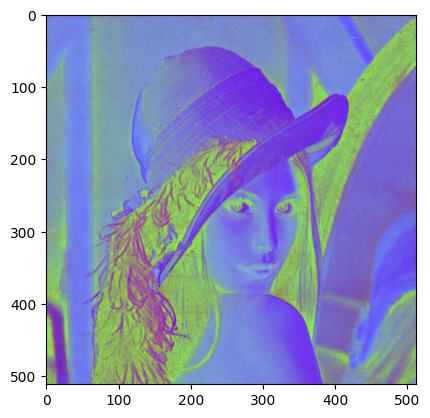

In [ ]:
#reading the image 
plt.figure(16,10)
plt.subplot()
image = cv2.imread('data.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
#converting image to Gray scale 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#plotting the grayscale image
plt.imshow(gray_image) 

#converting image to HSV format
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#plotting the HSV image
plt.imshow(hsv_image)

# plt.imshow(image)
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()
# #saving image
# cv2.imwrite('test_write.jpg',image)

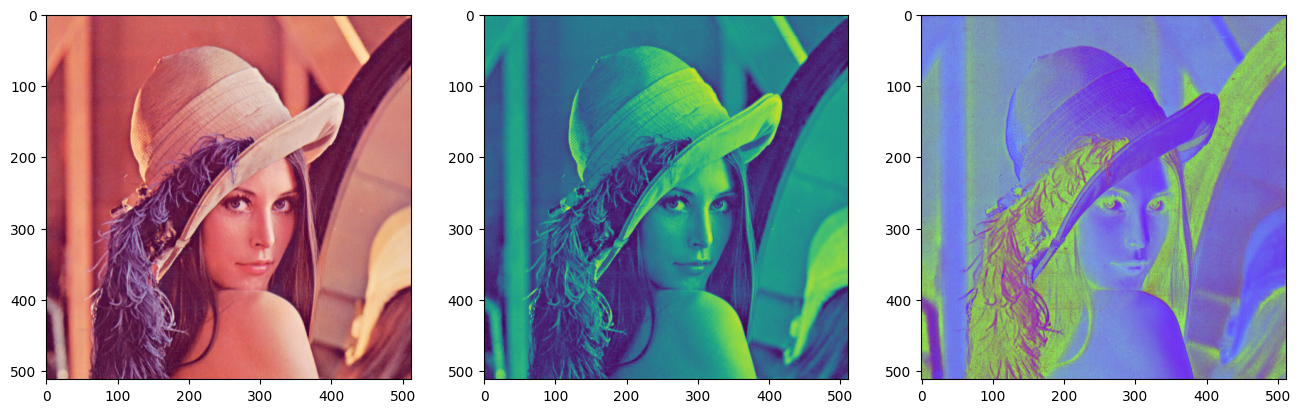

In [ ]:
#reading the image 
fig =plt.figure(figsize=(16,10))
fig.subplots(1,3)
image = cv2.imread('data.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.subplot(1,3,1)
# plt.imshow(image)
#converting image to Gray scale 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#plotting the grayscale image
plt.subplot(1,3,2)
plt.imshow(gray_image) 

#converting image to HSV format
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#plotting the HSV image
plt.subplot(1,3,3)
plt.imshow(hsv_image)

# plt.imshow(image)
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()
# #saving image
# cv2.imwrite('test_write.jpg',image)

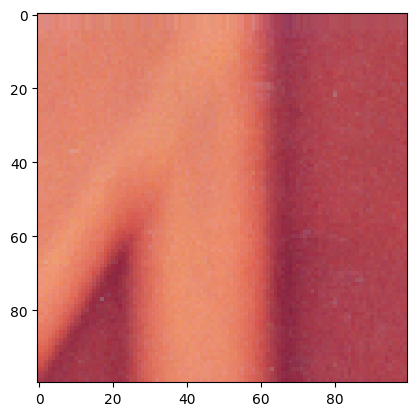

In [11]:

#  Cropping the image (here we're cropping a 100x100 square from the top-left corner)
cropped_image = image[0:100, 0:100]
 
# Show the cropped image
# cv2.imshow('Cropped Image', cropped_image)
plt.imshow(cropped_image) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# pip install opencv-python
# # https://pypi.org/project/opencv-python/

## Resizing Images
* Machine learning models work with a fixed sized input. The same idea applies to computer vision models as well. The images we use for training our model must be of the same size.

Now this might become problematic if we are creating our own dataset by scraping images from various sources. That’s where the function of resizing images comes to the fore.

Images can be easily scaled up and down using OpenCV. This operation is useful for training deep learning models when we need to convert images to the model’s input shape. Different interpolation and downsampling methods are supported by OpenCV, which can be used by the following parameters:

1. INTER_NEAREST: Nearest neighbor interpolation
2. INTER_LINEAR: Bilinear interpolation
3. INTER_AREA: Resampling using pixel area relation
4. INTER_CUBIC: Bicubic interpolation over 4×4 pixel neighborhood
5. INTER_LANCZOS4: Lanczos interpolation over 8×8 neighborhood

* note: OpenCV’s resize function uses bilinear interpolation by default.

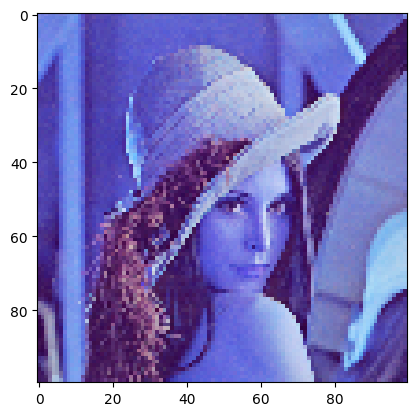

In [16]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
#reading the image 
image = cv2.imread('data.png') 
#converting image to size (100,100,3) 
# smaller_image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
smaller_image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)

#plot the resized image
plt.imshow(smaller_image)

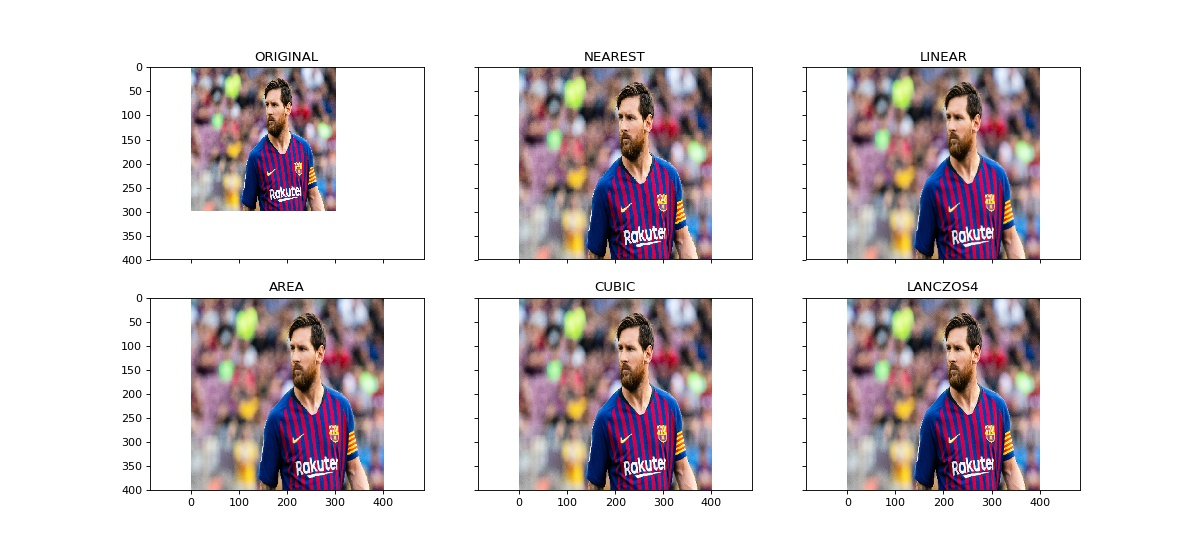

# Image Rotation

“You need a large amount of data to train a deep learning model”. I’m sure you must have comes across this line of thought in form or another. It’s partially true – most deep learning algorithms are heavily dependent on the quality and quantity of the data.

But what if you do not have a large enough dataset? Not all of us can afford to manually collect and label images.

Suppose we are building an image classification model for identifying the animal present in an image. So, both the images shown below should be classified as ‘dog’:

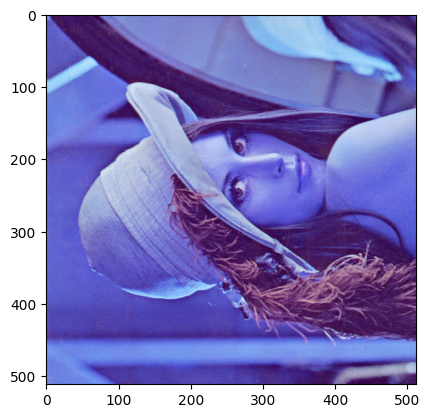

In [17]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
image = cv2.imread('data.png') 
rows,cols = image.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

## Image Translation
Image translation is a geometric transformation that maps the position of every object in the image to a new location in the final output image. After the translation operation, an object present at location (x,y) in the input image is shifted to a new position (X,Y):

X = x + dx

Y = y + dy

Here, dx and dy are the respective translations along different dimensions.

Image translation can be used to add shift invariance to the model, as by tranlation we can change the position of the object in the image give more variety to the model that leads to better generalizability which works in difficult conditions i.e. when the object is not perfectly aligned to the center of the image.

This augmentation technique can also help the model correctly classify images with partially visible objects. Take the below image for example. Even when the complete shoe is not present in the image, the model should be able to classify it as a Shoe.

In [ ]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
#reading the image
image = cv2.imread('index.png')
#shifting the image 100 pixels in both dimensions
M = np.float32([[1,0,-100],[0,1,-100]]) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

## Section 12: Setting Up Development Environment



# section 13 basic of cv

### Reading and Displaying an Image using OpenCV
Article 1: Reading and Displaying an Image using OpenCV
Introduction:
In computer vision, reading and displaying an image is a basic yet essential task. OpenCV, a powerful library, makes it simple to read an image from a file and display it in a window. This article walks you through reading an image and displaying it using OpenCV.

Code Explanation:
python
Copy codeimport cv2
 
# Read an image from file
image = cv2.imread('input_image.jpg')  # Replace 'input_image.jpg' with your image path
 
# Show the original image
cv2.imshow('Original Image', image)
 
cv2.waitKey(0)  # Wait until any key is pressed
cv2.destroyAllWindows()
Step-by-Step Breakdown:
Reading the Image:

The function cv2.imread() is used to load an image from a specified file path.

Make sure to provide the correct path to your image file.

Displaying the Image:

cv2.imshow() opens a window to display the image. The first argument is the window title, and the second argument is the image to display.

Waiting for a Key Press:

The cv2.waitKey(0) function keeps the window open until any key is pressed.

Once a key is pressed, cv2.destroyAllWindows() closes the window.

Note: Due to some technical concerns, this lecture is in article form. Our team will try our best to update the article with videos soon, and you will be updated accordingly. Until then, feel free to review this article-based lecture. Thank you!

Cropping an Image using OpenCV
Introduction:
Cropping allows you to extract a portion of an image for further processing or analysis. OpenCV enables easy cropping by using image slicing. In this article, you will learn how to crop an image.

Code Explanation:
python
Copy code# Cropping the image (here we're cropping a 100x100 square from the top-left corner)
cropped_image = image[0:100, 0:100]
 
# Show the cropped image
cv2.imshow('Cropped Image', cropped_image)
 
cv2.waitKey(0)
cv2.destroyAllWindows()
Step-by-Step Breakdown:
Cropping the Image:

OpenCV stores images as NumPy arrays, and cropping is achieved by slicing the array.

The code image[0:100, 0:100] selects the pixel rows from 0 to 100 and columns from 0 to 100, resulting in a 100x100 cropped image.

Displaying the Cropped Image:

The cropped portion of the image is displayed using the cv2.imshow() function, similar to how the full image was displayed earlier.

Closing the Window:

As before, cv2.waitKey(0) waits for a key press and cv2.destroyAllWindows() closes the window.

Note: Due to some technical concerns, this lecture is in article form. Our team will try our best to update the article with videos soon, and you will be updated accordingly. Until then, feel free to review this article-based lecture. Thank you!

## Resizing an Image using OpenCV
Introduction:
Resizing is important when working with images, especially for creating thumbnails or adjusting image dimensions for further analysis. OpenCV allows you to resize an image by scaling its width and height. This article explains how to resize an image in OpenCV.

Code Explanation:
python
Copy code# Resizing the image (scaling it down to 50% of its original size)
resized_image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)
 
# Show the resized image
cv2.imshow('Resized Image', resized_image)
 
cv2.waitKey(0)
cv2.destroyAllWindows()
Step-by-Step Breakdown:
Resizing the Image:

The cv2.resize() function is used to resize the image.

Setting (0, 0) for the size and using the fx=0.5 and fy=0.5 parameters scale the width and height by 50%, effectively resizing the image to half its original size.

Displaying the Resized Image:

The resized image is displayed in a new window using cv2.imshow(), just as the original image was displayed.

Closing the Window:

The window is closed using cv2.waitKey(0) and cv2.destroyAllWindows().

Note: Due to some technical concerns, this lecture is in article form. Our team will try our best to update the article with videos soon, and you will be updated accordingly. Until then, feel free to review this article-based lecture. Thank you!

## Saving Cropped and Resized Images using OpenCV
Introduction:
After processing an image, you may want to save the output for future use. OpenCV makes saving images easy with the cv2.imwrite() function. In this article, we will save cropped and resized images using OpenCV.

Code Explanation:
python
Copy code# Save the cropped and resized images
cv2.imwrite('cropped_image.jpg', cropped_image)
cv2.imwrite('resized_image.jpg', resized_image)
 
print('Images have been saved successfully.')
Step-by-Step Breakdown:
Saving Images:

The function cv2.imwrite() saves an image to the specified file path.

The first argument is the file path where the image will be saved, and the second argument is the image to save.

In this example, the cropped and resized images are saved as 'cropped_image.jpg' and 'resized_image.jpg', respectively.

Completion Message:

After saving the images, a message is printed to indicate success.

Note: Due to some technical concerns, this lecture is in article form. Our team will try our best to update the article with videos soon, and you will be updated accordingly. Until then, feel free to review this article-based lecture. Thank you!

## Section 14: Project 1: Basic Image Manipulation (Beginner Level)

Section Recap - Project 1
Project 1: Basic Image Manipulation with OpenCV
In this section, we explore basic image manipulation techniques using OpenCV. This project allows us to understand fundamental operations such as adding text, drawing shapes, and applying transformations (rotation, scaling, and translation) to images. These skills form the foundation for more advanced computer vision tasks.

Step 1: Adding Text to an Image
The first step involves reading an image and adding text to it. We use the cv2.putText() function to overlay text on the image.

python
Copy code# Read the image
image = cv2.imread('example.jpg')  # Replace 'example.jpg' with your image path
 
# Add text to the image
cv2.putText(image, 'OpenCV Tutorial', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)  
# Text: 'OpenCV Tutorial', position: (50, 50), font: Hershey Simplex, size: 1, color: white, thickness: 2
 
# Display the image with text
cv2.imshow('Image with Text', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.putText(): Adds text to the image.

Parameters: Text content, position, font, scale, color, and thickness.

Step 2: Drawing Shapes on an Image
Next, we explore how to draw basic shapes like circles, rectangles, and lines on an image. This is useful for highlighting specific regions or marking objects.

python
Copy code# Import OpenCV library
import cv2
 
# Read the image
image = cv2.imread('example.jpg')  # Replace 'example.jpg' with your image path
 
# Draw a circle on the image
cv2.circle(image, (150, 150), 50, (255, 0, 0), 2)  # Center at (150, 150), radius: 50, color: blue, thickness: 2
 
# Draw a rectangle on the image
cv2.rectangle(image, (50, 50), (200, 200), (0, 255, 0), 3)  # Top-left (50, 50), bottom-right (200, 200), color: green, thickness: 3
 
# Draw a line on the image
cv2.line(image, (10, 10), (300, 300), (0, 0, 255), 1)  # From (10, 10) to (300, 300), color: red, thickness: 1
 
# Display the image with shapes
cv2.imshow('Image with Shapes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.circle(): Draws a circle at a specified position.

cv2.rectangle(): Draws a rectangle between two corners.

cv2.line(): Draws a line between two points.

Step 3: Applying Transformations (Rotation, Scaling, and Translation)
Now we apply transformations to manipulate the image, including rotating, scaling, and translating.

a. Rotating the Image
We rotate the image by 45 degrees around its center.

python
Copy codeimport cv2
import numpy as np
 
# Load the image
image = cv2.imread('example.jpg')  # Replace 'example.jpg' with your image path
 
# Get image dimensions
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
 
# Apply rotation
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)  # Rotate by 45 degrees
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
 
# Display the rotated image
cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.getRotationMatrix2D(): Creates a transformation matrix for rotating the image.

cv2.warpAffine(): Applies the rotation to the image.

b. Scaling the Image
We resize the image by scaling it 1.5 times in both width and height.

python
Copy code# Apply scaling
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)  # Scale by 1.5x
 
# Display the scaled image
cv2.imshow('Scaled Image', scaled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.resize(): Resizes the image based on specified scaling factors (fx and fy).

c. Translating the Image
We shift the image 50 pixels along both the x and y axes.

python
Copy code# Apply translation
translation_matrix = np.float32([[1, 0, 50], [0, 1, 50]])  # Translate by 50 pixels in x and y directions
translated_image = cv2.warpAffine(image, translation_matrix, (w, h))
 
# Display the translated image
cv2.imshow('Translated Image', translated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.warpAffine(): Applies translation to shift the image.

Conclusion
In this section, we covered the following basic image manipulation techniques:

Adding text to an image.

Drawing shapes like circles, rectangles, and lines.

Applying transformations such as rotation, scaling, and translation.

These basic operations form the groundwork for more advanced image processing tasks in OpenCV, which we will explore in future projects. Stay tuned for the next lecture, where we’ll dive into real-time face detection and continue our journey in computer vision!

# Section 15: Project 2: Real-Time Face Detection (Intermediate Level

Section Recap - Project 2
### **Project 2: Real-Time Face Detection with OpenCV**



In this project, we take our computer vision journey to the next level by building a real-time face detection system using your PC's camera. The aim of this project is to access the system's webcam and detect faces in real-time using a pre-trained Haar cascade classifier.



#### **Step 1: Importing Libraries**



We will begin by importing the necessary libraries, **OpenCV** and **NumPy**. OpenCV is a powerful library for image processing, while NumPy is used for handling arrays and matrices of data.



```python

import cv2

import numpy as np

```



#### **Step 2: Loading the Haar Cascade Classifier**



The Haar cascade classifier is a pre-trained model that can detect faces. OpenCV provides us with this model in the form of an XML file. This file contains the data needed to identify faces in an image.



We will load this file into our program using the `cv2.CascadeClassifier()` function and reference the pre-trained face detection model stored in OpenCV’s data.



```python

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

```



#### **Step 3: Accessing the Webcam**



To capture live video, we will use the `cv2.VideoCapture()` function. The parameter `0` is used to select the default webcam. If you have multiple cameras connected, you can change the number to use a different camera.



```python

video_capture = cv2.VideoCapture(0)



if not video_capture.isOpened():

    print("Error accessing the camera")

    exit()

```



#### **Step 4: Capturing Frames in a Loop**



We’ll create a while loop to continuously capture frames from the webcam. Each frame will be processed one by one to detect faces in real time.



```python

while True:

    # Capture frame-by-frame

    ret, frame = video_capture.read()

   

    if not ret:

        print("Error reading frame from webcam")

        break

```



#### **Step 5: Converting Frames to Grayscale**



Face detection works more efficiently with grayscale images, as it reduces the amount of data and makes detection faster. We’ll convert each frame to grayscale using the `cv2.cvtColor()` function.



```python

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

```



#### **Step 6: Detecting Faces**



Now that we have the grayscale frame, we will detect faces using the `detectMultiScale()` function. This function finds faces of different sizes in the image. It takes several parameters:

- **Scale Factor**: Adjusts for faces of different sizes.

- **minNeighbors**: Sets the minimum number of neighboring rectangles required to retain a face.

- **minSize**: Specifies the minimum size of the detected face.



```python

    faces = face_cascade.detectMultiScale(

        gray,

        scaleFactor=1.1,

        minNeighbors=5,

        minSize=(30, 30)

    )

```



---



### **Project 2 Continued: Drawing Rectangles Around Detected Faces**



Now that we’ve successfully detected faces in the video feed, it’s time to enhance our program by visually marking these detections. We’ll draw rectangles around the detected faces, making it easier to identify them in the video frame.



#### **Step 7: Adding a For Loop to Process Detected Faces**



In this step, we will loop through the list of detected faces and draw a rectangle around each one. The `detectMultiScale()` function provides coordinates for the top-left and bottom-right corners of the face, which we’ll use to draw these rectangles.



```python

for (x, y, w, h) in faces:

    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

```

- `x, y`: Top-left corner of the rectangle.

- `w, h`: Width and height of the rectangle.

- `(255, 0, 0)`: Color of the rectangle (in this case, blue). You can modify the color to red or green.

- `2`: Thickness of the rectangle in pixels.



#### **Step 8: Displaying the Image with Detected Faces**



Once the rectangles are drawn, we need to display the video frame with the detection rectangles. For this, we use `cv2.imshow()` to show the video feed.



```python

cv2.imshow('Face Detection', frame)

```



#### **Step 9: Exiting the Loop**



We need to provide a way for users to exit the loop and stop the program. We’ll listen for the 'q' key, and when pressed, the program will break out of the loop and close all OpenCV windows.



```python

if cv2.waitKey(1) & 0xFF == ord('q'):

    break

```



#### **Step 10: Releasing Resources**



After the loop ends, it’s important to free up the webcam and close any windows opened by OpenCV.



```python

video_capture.release()

cv2.destroyAllWindows()

```



#### **The Full Program Code (with Comments)**



Here’s the full code, including comments to explain each step:



```python

# Import necessary libraries

import cv2

import numpy as np



# Load the pre-trained Haar cascade classifier for face detection

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')



# Start capturing video from the webcam

video_capture = cv2.VideoCapture(0)



if not video_capture.isOpened():

    print("Error accessing the camera")

    exit()



# Main loop to process each video frame

while True:

    # Capture frame-by-frame

    ret, frame = video_capture.read()

   

    if not ret:

        print("Error reading frame from webcam")

        break



    # Convert the captured frame to grayscale

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)



    # Detect faces in the grayscale image

    faces = face_cascade.detectMultiScale(

        gray,

        scaleFactor=1.1,

        minNeighbors=5,

        minSize=(30, 30)

    )



    # Draw a rectangle around each detected face

    for (x, y, w, h) in faces:

        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)



    # Display the resulting frame

    cv2.imshow('Face Detection', frame)



    # Break the loop if 'q' is pressed

    if cv2.waitKey(1) & 0xFF == ord('q'):

        break



# Release the video capture object and close all windows

video_capture.release()

cv2.destroyAllWindows()

```



### **Face Reveal Demo**



After writing the code, the instructor demonstrates the program by showing the webcam capturing their face. The program detects their face and draws a blue rectangle around it. They also showcase how the program detects other objects, such as a Doraemon figure in the background.



The program is fully functional but may lag if a heavy recording software is running in the background.



### **Conclusion of Project 2**



With this, we have completed Project 2. You now have a basic real-time face detection system using OpenCV and Python, capable of identifying and marking faces in live video streams. In the next project, we’ll dive even deeper into computer vision. Stay tuned!



**See you in the next lecture!**

# Section 16: Face Recognition using FER (Advanced Level)

Section Recap - Project 3
Project 3: Facial Expression Recognition with OpenCV
In this section, we dive deeper into computer vision, a crucial domain of AI, by creating a Facial Expression Recognizer. This project will enable us to detect and classify various emotions such as happiness, sadness, surprise, and more using OpenCV and a pre-trained model. The system analyzes facial expressions in real-time from the webcam feed.

Step 1: Setting Up the Environment
First, ensure OpenCV is installed. You can install it via pip:

bash
Copy codepip install opencv-python
We will also need a pre-trained model for emotion recognition. For this, the FER (Facial Expression Recognition) library is commonly used, so we import it as well.

Step 2: Importing Libraries
We’ll begin by importing the necessary libraries for this project:

python
Copy codeimport cv2
from fer import FER
cv2: OpenCV for image processing.

FER: A pre-trained facial expression recognition model.

Step 3: Initializing the Emotion Detector and Webcam Feed
Next, we initialize the Emotion Detector using the pre-trained FER model. Then, we start capturing video from the webcam, just as we did in previous face detection projects.

python
Copy codeemotion_detector = FER()
cap = cv2.VideoCapture(0)  # Start webcam feed
Step 4: Capturing Frames in a Loop
We now capture video frames continuously in a loop, allowing us to process them one by one to recognize emotions in real time.

python
Copy codewhile True:
    ret, frame = cap.read()  # Capture each frame
    if not ret:
        print("Error reading frame")
        break
Step 5: Detecting Emotions
The next step is to detect the emotions in each captured frame. The FER model provides us with emotion predictions for the face(s) detected in the frame.

python
Copy code    emotions = emotion_detector.detect_emotions(frame)
    if emotions:
        emotion_data = emotions[0]  # Take the first detected face
        # Get the emotion with the highest confidence
        highest_confidence_emotion = max(emotion_data["emotions"], key=emotion_data["emotions"].get)
Here, we are capturing the emotion with the highest confidence to display it.

Step 6: Drawing the Rectangle and Emotion Text
Once an emotion is detected, we draw a rectangle around the face and display the detected emotion on the screen, along with its confidence level.

python
Copy code        (x, y, w, h) = emotion_data["box"]  # Get coordinates for the rectangle
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Draw rectangle
        cv2.putText(frame, highest_confidence_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
Step 7: Displaying the Video Feed
We’ll use cv2.imshow() to display the video feed with the detected emotion and bounding box around the face.

python
Copy code    cv2.imshow('Emotion Detector', frame)
Step 8: Exiting the Loop
We allow the user to exit the program by pressing the 'q' key. When this happens, we release the webcam and close all OpenCV windows.

python
Copy code    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
Step 9: Releasing Resources
Finally, we release the webcam and close any windows that were opened by OpenCV.

python
Copy codecap.release()
cv2.destroyAllWindows()
Full Code (with Comments)
Here’s the full code with comments to explain each part:

python
Copy codeimport cv2
from fer import FER
 
# Initialize emotion detector
emotion_detector = FER()
 
# Start webcam feed
cap = cv2.VideoCapture(0)
 
# Loop to capture frames from the webcam
while True:
    ret, frame = cap.read()
    if not ret:
        print("Error reading frame")
        break
 
    # Detect emotions in the frame
    emotions = emotion_detector.detect_emotions(frame)
    
    if emotions:
        # Get the first detected face's emotion data
        emotion_data = emotions[0]
        # Find the emotion with the highest confidence
        highest_confidence_emotion = max(emotion_data["emotions"], key=emotion_data["emotions"].get)
        
        # Get coordinates of the face and draw a rectangle around it
        (x, y, w, h) = emotion_data["box"]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
 
        # Display the emotion with the highest confidence on the frame
        cv2.putText(frame, highest_confidence_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
 
    # Display the frame with emotion detection
    cv2.imshow('Emotion Detector', frame)
 
    # Exit loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
# Release webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()
Demonstration and Emotion Detection
Once the program is running, you can show your face on the webcam, and the system will detect your emotions in real-time. The instructor demonstrates the emotion detection by showing various facial expressions, including happiness, sadness, and surprise. The software also detects the emotions of other animated characters, such as Doraemon and Mickey Mouse.

Conclusion
This facial expression recognizer uses the power of AI and computer vision to detect and classify emotions in real-time video streams. By leveraging pre-trained models, the task of emotion recognition becomes straightforward and effective. This marks the completion of our Facial Expression Recognizer project.

In the next project, we’ll explore further applications of computer vision, taking our AI skills even deeper.

See you in the next lecture!

## Conclusion - OpenCV
Congratulations! You’ve now completed the course on OpenCV and Computer Vision, covering everything from basic image manipulations to real-time face detection and facial emotion recognition. By the end of this course, you have learned key skills in image processing, transformations, and even real-time computer vision applications that are widely used in the industry today.

Throughout the course, you gained hands-on experience with the core libraries, tools, and techniques necessary for working in the field of computer vision. Whether you were just starting with OpenCV or looking to advance your existing skills, this course has equipped you with a strong foundation in both beginner and intermediate-level topics.

We also explored real-world applications of face detection and emotion recognition using FER, which are practical and valuable in a wide range of sectors such as security, healthcare, and entertainment.

Next Steps
Now that you’ve completed this course, here are some recommendations for your next steps:

Explore More Complex Computer Vision Projects:
Consider building on your current skills by exploring more advanced topics like object detection, image segmentation, or deep learning in computer vision with libraries such as TensorFlow or PyTorch.

Work on Personal Projects:
Start applying the skills you’ve learned in real-world projects. Whether it's a face recognition system, an emotion detection app, or a personal camera project, practicing is key to mastering computer vision.

Stay Updated with OpenCV and CV Libraries:
OpenCV is a continuously evolving library. Keep up with the latest updates, tutorials, and features that the OpenCV community and other computer vision resources provide.

Consider Exploring AI Integration:
Computer vision combined with AI technologies opens up numerous opportunities. You can expand your knowledge by learning how to integrate computer vision with machine learning algorithms to create even smarter applications.

Lecture 23: Thank You!
Thank you for enrolling in this course and dedicating your time to learn Computer Vision with OpenCV. I hope you have found the content helpful, engaging, and informative. I encourage you to take the skills you’ve learned here and apply them to your own creative projects. The world of computer vision is vast and exciting, and now you are equipped to explore it further!

If you have any questions, need additional resources, or want to share your progress, feel free to reach out. The journey doesn’t stop here, and I’m excited to see how you continue to grow and apply what you’ve learned!

Good luck with your projects, and I look forward to seeing the amazing things you will create!

All the best, and happy coding!

## Thank You and Conclusion
Congratulations on completing the course! You’ve come a long way in learning how to build your own AI assistant using Python, as well as exploring the exciting field of computer vision. Throughout this course, we’ve covered a wide range of topics that have equipped you with valuable skills. Let’s take a moment to reflect on what you've achieved:

In the Python AI Assistant Section:
You learned the basics of creating a voice-enabled AI assistant, incorporating features like text-to-speech, speech recognition, and various functionalities like Wikipedia search, weather updates, translations, and system controls.

You gained practical experience working with libraries like pyttsx3, speech_recognition, googletrans, and wikipediaapi.

We even explored building a user-friendly GUI using Tkinter, which added a professional touch to your project.

In the Computer Vision Section:
You mastered the basics of image manipulation using OpenCV, drawing shapes, adding text, and performing transformations.

You then moved on to more advanced applications like face detection, real-time emotion recognition, and working with Haar cascades.

You also explored object tracking and enhanced your skills in edge detection and image enhancement.

What’s Next?
Now that you've completed this course, here are some suggested next steps to continue your journey:

Expand Your Projects:

With the knowledge gained, try creating more advanced AI applications or dive deeper into computer vision with machine learning and deep learning techniques using libraries like TensorFlow or PyTorch.

Personalize Your AI Assistant:

Add more functionality to your assistant, like connecting it to third-party APIs or integrating it with a database to store user preferences or past interactions.

Explore More Advanced Computer Vision Topics:

Dive into object detection, image segmentation, and explore more in-depth algorithms like YOLO or Mask R-CNN for real-time image recognition tasks.

Contribute to Open-Source Projects:

Share your knowledge and projects with the community! Consider contributing to open-source repositories or starting your own.

Stay Updated:

The world of AI and computer vision is constantly evolving. Keep learning, follow the latest trends in the field, and experiment with new techniques and technologies.